In [16]:
import pandas as pd
import numpy as np
import os
import glob
import plotly.express as px

In [17]:
%cd /Volumes/SEB_USB/Andrea_Thermal_2020/Manual/

/Volumes/SEB_USB/Andrea_Thermal_2020/Manual


In [18]:
os.chdir("plant_detections_atm/")
            
df = pd.DataFrame()
for file in glob.glob("*.csv", recursive = True):
     if file.endswith('.csv'):
            csv = pd.read_csv(file)
            csv['filename'] = os.path.basename(file)
            df = df.append(csv)
            del df['Unnamed: 0']

In [19]:
df = df.reset_index()
del df['index']

In [20]:
df['plot'] = df['plot'].astype(str).str.zfill(4)
df['date'] = pd.to_datetime(df['filename'].str[0:10])#.dt.date

In [21]:
%cd /Volumes/SEB_USB/Andrea_Thermal_2020/Manual/

/Volumes/SEB_USB/Andrea_Thermal_2020/Manual


In [22]:
selected_lines = pd.read_csv('selected_lines.csv')

selected_lines['Treatment'] = None
for i, row in selected_lines.iterrows():
    plot = pd.to_numeric(row['plot'])
    if plot < 2800:
        selected_lines.at[i, "Treatment"] = 'WW'
    else:
        selected_lines.at[i, "Treatment"] = 'WL'
        
selected_lines['plot'] = selected_lines['plot'].astype(str).str.zfill(4)

In [23]:
selected_lines_list = selected_lines['plot'].to_list()

In [24]:
queried_df = df[df['plot'].isin(selected_lines_list)]

In [25]:
queried_df = queried_df.set_index('plot')
selected_lines = selected_lines.set_index('plot')

In [26]:
queried_df = queried_df.join(selected_lines).dropna(subset = ['atm_temp'])

In [27]:
queried_df = queried_df.reset_index()

In [28]:
queried_df = queried_df.sort_values(by = ['date', 'plot'])#.set_index('Treatment')

queried_df['Range'] = queried_df['plot'].str[0:2]
queried_df['Column'] = queried_df['plot'].str[2:]

In [39]:
queried_df_WL = queried_df[queried_df['Treatment'] == 'WL']
queried_df_WW = queried_df[queried_df['Treatment'] == 'WW']

In [40]:
queried_df_WW

,plot,lon,lat,min_x,max_x,min_y,max_y,nw_lat,nw_lon,se_lat,...,azmet_wind_velocity,azmet_VPD,azmet_solar_radiation,relative_humidity,filename,date,genotype,Treatment,Range,Column
2486,2901,-111.975051,33.075541,55.250000,138.500000,606.250000,688.500000,33.075539,-111.975053,33.075542,...,2.133695,4.599456,-0.157973,28.267308,2020-07-31__22-42-24-561-individual_thermal.cs...,2020-07-31,BTx_623,WW,29,01
2503,3001,-111.975051,33.075589,62.750000,138.000000,335.750000,416.500000,33.075587,-111.975053,33.075590,...,3.695582,6.986013,2.277626,16.577678,2020-07-31__12-44-36-055-individual_thermal.cs...,2020-07-31,BTx_623,WW,30,01
2526,3101,-111.975053,33.075637,5.000000,129.000000,2.000000,188.000000,33.075633,-111.975056,33.075641,...,3.695740,6.975530,2.277015,16.610731,2020-07-31__12-44-36-055-individual_thermal.cs...,2020-07-31,BTx_623,WW,31,01
2527,3101,-111.975052,33.075637,5.000000,131.000000,0.000000,187.000000,33.075633,-111.975056,33.075641,...,2.158856,4.693978,-0.116378,27.894425,2020-07-31__22-42-24-561-individual_thermal.cs...,2020-07-31,BTx_623,WW,31,01
2548,3201,-111.975051,33.075656,71.857143,128.000000,438.571429,531.857143,33.075654,-111.975052,33.075658,...,3.695897,6.965046,2.276403,16.643784,2020-07-31__12-44-36-055-individual_thermal.cs...,2020-07-31,BTx_623,WW,32,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,5201,-111.975051,33.076378,18.000000,143.000000,347.666667,480.777778,33.076375,-111.975054,33.076381,...,1.459673,4.235404,1.752666,24.245957,2020-09-15__12-25-49-034-individual_thermal.cs...,2020-09-15,BTx_623,WW,52,01
3907,5202,-111.975044,33.076379,12.000000,88.428571,356.857143,434.428571,33.076377,-111.975047,33.076381,...,1.459673,4.235404,1.752666,24.245957,2020-09-15__12-25-49-034-individual_thermal.cs...,2020-09-15,PI_678037,WW,52,02
3925,5215,-111.974939,33.076383,23.000000,136.833333,244.833333,364.833333,33.076380,-111.974942,33.076385,...,1.459672,4.235398,1.752662,24.246073,2020-09-15__12-25-49-034-individual_thermal.cs...,2020-09-15,PI_677985,WW,52,15
3943,5231,-111.974806,33.076379,25.750000,146.000000,333.000000,440.000000,33.076376,-111.974809,33.076381,...,1.459672,4.235398,1.752662,24.246073,2020-09-15__12-25-49-034-individual_thermal.cs...,2020-09-15,PI_678140,WW,52,31


In [41]:
mean = queried_df.groupby(['date', 'genotype', 'plot']).mean().reset_index()
mean_WL = queried_df_WL.groupby(['date', 'genotype', 'plot']).mean().reset_index()
mean_WW = queried_df_WW.groupby(['date', 'genotype', 'plot']).mean().reset_index()

In [42]:
mean['Treatment'] = None
for i, row in mean.iterrows():
    plot = pd.to_numeric(row['plot'])
    if plot < 2800:
        mean.at[i, "Treatment"] = 'WW'
    else:
        mean.at[i, "Treatment"] = 'WL'

mean_WL['Treatment'] = 'WL'
mean_WW['Treatment'] = 'WW'

In [43]:
mean['CTD'] = mean['atm_temp'] - mean['median']
mean_WL['CTD'] = mean_WL['atm_temp'] - mean_WL['median']
mean_WW['CTD'] = mean_WW['atm_temp'] - mean_WW['median']

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in true_divide



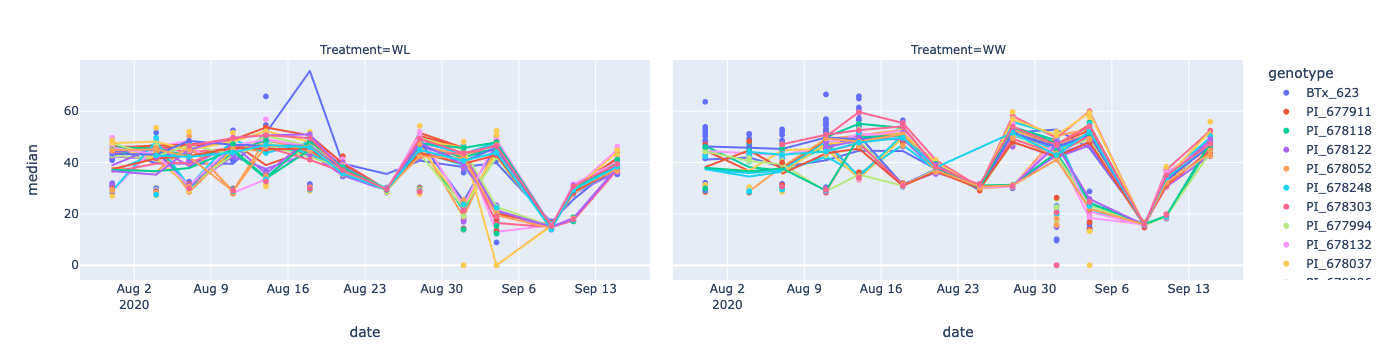

In [45]:
px.scatter(queried_df, x = 'date', y = 'median', color = 'genotype', trendline="lowess", trendline_options=dict(frac=0.1), facet_col="Treatment")

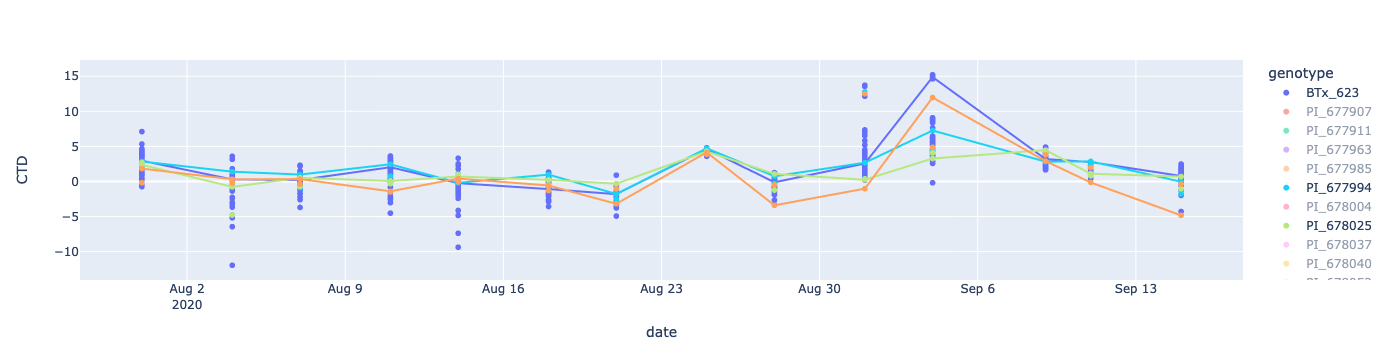

In [314]:
px.scatter(mean_WL, x = 'date', y = 'CTD', color = 'genotype', trendline="lowess", trendline_options=dict(frac=0.1))

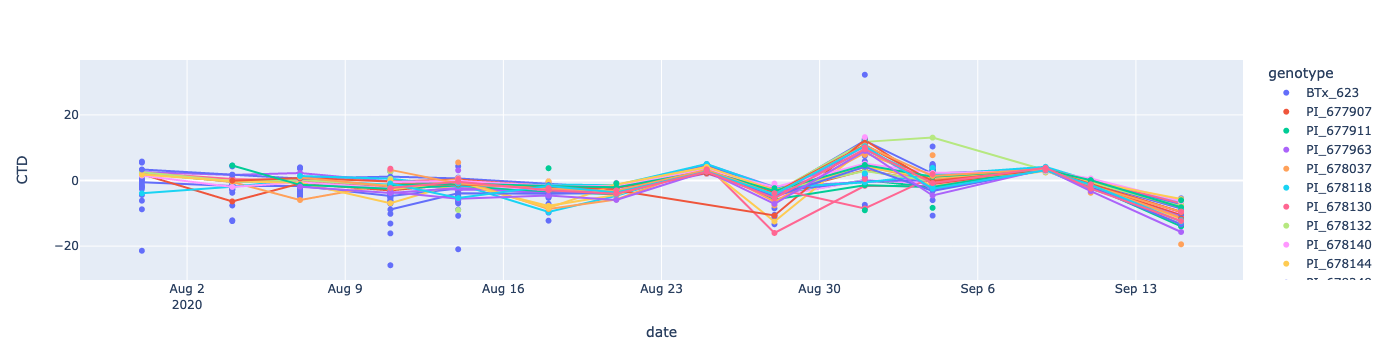

In [315]:
px.scatter(mean_WW, x = 'date', y = 'CTD', color = 'genotype', trendline="lowess", trendline_options=dict(frac=0.1))